In [0]:
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub

from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

In [2]:
vocabulary_size = 5000
max_words = 500

(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words = vocabulary_size)

17465344/17464789 [==============================] - 1s 0us/step


In [3]:
word2id = imdb.get_word_index()
id2word = {i: word for word, i in word2id.items()}

1646592/1641221 [==============================] - 0s 0us/step


In [0]:
X_train = sequence.pad_sequences(X_train, maxlen = max_words)
X_test = sequence.pad_sequences(X_test, maxlen = max_words)

embedding_size = 32

In [5]:
X_train_LSTM = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_train_LSTM.shape

(25000, 1, 500)

In [0]:
model1 = Sequential()
model1.add(LSTM(100, input_shape = (X_train_LSTM.shape[1], X_train_LSTM.shape[2])))
model1.add(Dense(1, activation = 'sigmoid'))

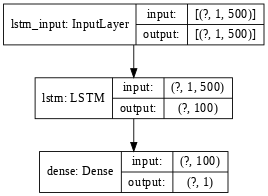

In [7]:
tf.keras.utils.plot_model(model1, show_shapes = True, dpi = 64)

In [0]:
model1.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

batch_size = 64
num_epochs = 3

X_valid, y_valid = X_train_LSTM[:batch_size], y_train[:batch_size]  
X_train2, y_train2 = X_train_LSTM[batch_size:], y_train[batch_size:]

In [9]:
model1.fit(X_train2, y_train2,
          validation_data = (X_valid, y_valid),
          batch_size = batch_size, epochs = num_epochs)

Epoch 1/3
390/390 [==============================] - 2s 6ms/step - loss: 0.7094 - accuracy: 0.5022 - val_loss: 0.7407 - val_accuracy: 0.3750
Epoch 2/3
390/390 [==============================] - 2s 5ms/step - loss: 0.6965 - accuracy: 0.5135 - val_loss: 0.6973 - val_accuracy: 0.4688
Epoch 3/3
390/390 [==============================] - 2s 5ms/step - loss: 0.6935 - accuracy: 0.5131 - val_loss: 0.6974 - val_accuracy: 0.4062


In [0]:
model2 = Sequential()
model2.add(Embedding(vocabulary_size, embedding_size, input_length = max_words))
model2.add(LSTM(100))
model2.add(Dense(1, activation = 'sigmoid'))

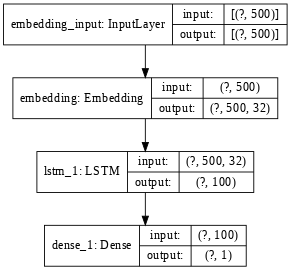

In [11]:
tf.keras.utils.plot_model(model2, show_shapes = True, dpi = 64)

In [0]:
model2.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

batch_size = 64
num_epochs = 3

X_valid, y_valid = X_train[:batch_size], y_train[:batch_size]  
X_train2, y_train2 = X_train[batch_size:], y_train[batch_size:]

In [13]:
model2.fit(X_train2, y_train2,
          validation_data = (X_valid, y_valid),
          batch_size = batch_size, epochs = num_epochs)

Epoch 1/3
390/390 [==============================] - 32s 81ms/step - loss: 0.4690 - accuracy: 0.7773 - val_loss: 0.2463 - val_accuracy: 0.8594
Epoch 2/3
390/390 [==============================] - 30s 78ms/step - loss: 0.3329 - accuracy: 0.8721 - val_loss: 0.3691 - val_accuracy: 0.8906
Epoch 3/3
390/390 [==============================] - 30s 78ms/step - loss: 0.2471 - accuracy: 0.9031 - val_loss: 0.2438 - val_accuracy: 0.9062


In [15]:
!wget http://nlp.stanford.edu/data/glove.6B.zip

--2020-06-04 18:38:07--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2020-06-04 18:38:07--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2020-06-04 18:38:08--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6

In [16]:
!unzip glove.6B.zip

Archive:  glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       


In [17]:
def get_coefs(word,*arr): 
    return word, np.asarray(arr, dtype = 'float32')

embeddings_index = dict(get_coefs(*o.strip().split()) for o in open('glove.6B.50d.txt','rb'))

all_embs = np.stack(embeddings_index.values())
emb_mean,emb_std = all_embs.mean(), all_embs.std()
embed_size = 50
embedding_matrix = np.random.normal(emb_mean, emb_std, (vocabulary_size, embed_size))

for word, i in word2id.items():
    if i >= vocabulary_size: 
        continue 
    embedding_vector = embeddings_index.get(word) 
    
    if embedding_vector is not None: 
        embedding_matrix[i] = embedding_vector 

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2822: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if self.run_code(code, result):


In [0]:
model3 = Sequential()
model3.add(Embedding(vocabulary_size, embed_size, weights = [embedding_matrix], input_length = max_words, trainable = False))
model3.add(LSTM(100, return_sequences = True))
model3.add(tf.keras.layers.GlobalMaxPooling1D())
model3.add(Dense(1, activation = 'sigmoid'))

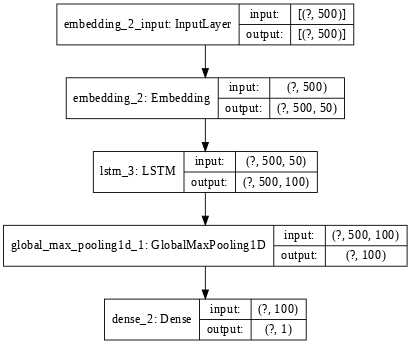

In [20]:
tf.keras.utils.plot_model(model3, show_shapes = True, dpi = 64)

In [21]:
model3.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model3.fit(X_train2, y_train2,
          validation_data = (X_valid, y_valid),
          batch_size = batch_size, epochs = 3)

Epoch 1/3
390/390 [==============================] - 30s 77ms/step - loss: 0.6128 - accuracy: 0.6581 - val_loss: 0.5207 - val_accuracy: 0.7812
Epoch 2/3
390/390 [==============================] - 30s 76ms/step - loss: 0.5155 - accuracy: 0.7497 - val_loss: 0.4632 - val_accuracy: 0.7969
Epoch 3/3
390/390 [==============================] - 30s 76ms/step - loss: 0.4489 - accuracy: 0.7939 - val_loss: 0.4194 - val_accuracy: 0.8594


In [22]:
idx = np.random.choice(X_train.shape[0])
review = " ".join([id2word[i] for i in X_train[idx] if i])
if model2.predict(np.reshape(X_train[idx], (1,-1))) < 0.5:
    label = 'negative'
else:
    label = 'positive'
print(review + '\n\nis ' + label)

the ignore and and and it of and war br is thought and like and and acting and no about order it age this is warning experiences go are is casting and desperately would it and br never empty movie about and into me cute will decide to her would there so and and viewing send richard and to so and park are about and out in at woman and smaller in and and in pleasant this about and not and are our that this pleasant is heaven i'd br songs send you've bob it years extremely in and game in caring about sort is offer br about order and and like asian camera film about and and game in car any give but is content br of sense for would and would it and in to as it know comes and direction gave be about process shall send movie it and film comes reality it they how and who of q happens to it titles his in cannot and who happens shape and and and is spent school this sadistic to and send it them and who of mix and and and and is entertainment cagney like gem made ridiculously of shall in why thin